# Some potential audiences are:

1. Homeowners who want to increase the sale price of their homes through home improvement projects
2. Advocacy groups who want to promote affordable housing
3. Local elected officials who want to understand how their policy ideas (e.g. zoning changes, permitting) might impact home prices
4. Real estate investors looking for potential "fixer-uppers" or "tear-downs"

# Three things to be sure you establish during this phase are:

1. **Objectives:** what questions are you trying to answer, and for whom?
2. **Project plan:** you may want to establish more formal project management practices, such as daily stand-ups or using a Trello board, to plan the time you have remaining. Regardless, you should determine the division of labor, communication expectations, and timeline.
3. **Success criteria:** what does a successful project look like? How will you know when you have achieved it?

# READ THIS: Import the following data files from https://info.kingcounty.gov/assessor/DataDownload/default.aspx
## Download the files to local repo data directory
> 1) Real Property Sales (.ZIP, csv) <BR>
> 2) Parcel (.ZIP, csv) <BR>
> 3) Residential Building (.ZIP, csv) <BR>
> 4) Unit Breakdown (.ZIP)<BR>


In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# A function named parse_2019(df) that takes a dataframe as the input.
# It takes in a dataframe, looks for relevant columns, and then keeps the rows that
# are in the year 2019.

def parse_2019(df):
    if 'DocumentDate' in df.columns:
        df = df[pd.to_datetime(df['DocumentDate']).dt.year == 2019 ]
    elif 'ChangeDate' in df.columns:
        df = df[df['ChangeDate'].astype(str).str[:4] == '2019']
    df.reset_index(drop = True)
    return df

In [4]:
## Create a function get_data(create_csv)
## If create_csv = True:
##.   create a combined file rp_cons.csv from other csv files and return a dataframe rp_cons
## If create_csv = False:
##    return a data_frame with all columns from rp_cons.csv

import pandas as pd

def get_data (create_csv):

    if create_csv == False:    
        rp_cons = pd.read_csv("data/rp_cons.csv")   
    return rp_cons
    
    df_rp_sales = get_sale()
    df_parcel = get_parcel()
    df_res_bldg = get_resBldg()
    df_unit_breakdown = get_unit_breakdown()
    
    
    return df_rpsales

### 1) Read EXTR_RPSale.csv 

In [12]:
# Data File: EXTR_RPSale.csv -------------------------------------------------------------
#Table: EXTR_RPSale 
#Keys: Major, Minor
#Fields: SalePrice, PropertyType, PrincipalUse
def get_sale():
    df_rp_sales = pd.read_csv('../data/EXTR_RPSale.csv', encoding = "ISO-8859-1", low_memory=False)
    print("Before Filer EXTR_RPSale.csv: ", df_rp_sales.shape)

    # Filter the following columns from EXTR_RPsale table
    # Primary key: 'Major', 'Minor' 
    # Select Fields: 'DocumentDate', 'SalePrice', 'PropertyType', 'PrincipalUse', 'PropertyClass
    cols = list(df_rp_sales.columns)
    df_rp_sales = df_rp_sales[cols[1:5] + cols[14:16] + cols[22:23]]
    df_rp_sales = parse_2019(df_rp_sales)
    print("After Filer EXTR_RPSale.csv: ", df_rp_sales.shape)  
    return df_rp_sales

### 2) Read EXTR_Parcel.csv 

In [32]:
#Data File: EXTR_Parcel.csv
#Table: EXTR_Parcel
#Keys: Major, Minor
#Fields: PropType, Area, SubArea,DistrictName, SqFtLot, WaterSystem, SewerSystem, Access, WaterProblems, AirportNoise, TrafficNoise,PowerLines,  LandSlideHazard, SeismicHazard

def get_parcel():
    df_parcel = pd.read_csv('../data/EXTR_Parcel.csv', encoding = "ISO-8859-1", low_memory=False)
    print("Before EXTR_Parcel.csv: ", df_parcel.shape)
    df_parcel.columns
    
    # Filter the following columns from EXTR_Parcel table
    # Primary key: 'Major', 'Minor' 
    # Select Fields: PropType, Area, SubArea, DistrictName, SqFtLot, WaterSystem, SewerSystem, Access, WaterProblems, AirportNoise, TrafficNoise,PowerLines,  LandSlideHazard, SeismicHazard
    cols = list(df_parcel.columns)
    df_parcel = df_parcel[cols[:2] + cols[10:11] + cols[15:16]]  ######## Change this
    df_parcel = parse_2019(df_parcel)
    print("After Filer EXTR_Parcel.csv: ", df_parcel.shape)
    return df_parcel

### 3) Read EXTR_ResBldg.csv 

In [35]:
#Data File: EXTR_ResBldg.csv
#Table: EXTR_ResBldg
#Keys: Major, Minor
#Fields: BldgNbr, NbrLivingUnits, Address, BuildingNumber, Stories, BldgGrade, SqFt1stFloor, SqFtHalfFloor, SqFt2ndFloor, SqFtUpperFloor, SqFtTotLiving, SqFtTotBasement, SqFtFinBasement, SqFtOpenPorch, SqFtEnclosedPorch, SqFtDeck, HeatSystem, HeatSource, Bedrooms, BathHafCouunt, Bath3qtrCount, BathFullCount, FpSingleStory, FpMultiStory, YrBuilt, YrRenovated 
def get_resBldg():
    df_res_bldg = pd.read_csv('../data/EXTR_ResBldg.csv', encoding = "ISO-8859-1", low_memory=False)
    print("Before EXTR_ResBldg.csv: ", df_res_bldg.shape)

    # Filter the following columns from EXTR_Parcel table
    # Primary key: 'Major', 'Minor' 
    # Select Fields: PropType, Area, SubArea, DistrictName, SqFtLot, WaterSystem, SewerSystem, Access, WaterProblems, AirportNoise, TrafficNoise,PowerLines,  LandSlideHazard, SeismicHazard
    cols = list(df_parcel.columns)
    df_res_bldg = df_res_bldg[cols[:2] + cols[10:11] + cols[15:16]]  ######## Change this    
    df_res_bldg = parse_2019(df_res_bldg)
    print("After Filer EXTR_Parcel.csv: ", df_res_bldg.shape)
    return df_res_bldg

### 4) Read EXTR_UnitBreakdown.csv 

In [30]:
#Data File: EXTR_UnitBreakdown.csv
#Table: EXTR_UnitBreakdown
#Keys: Major, Minor
#Fields:  'UnitTypeItemId', 'NbrThisType', 'SqFt','NbrBedrooms', 'NbrBaths'
def get_unitbreakdown():
    df_unit_breakdown = pd.read_csv('../data/EXTR_UnitBreakdown.csv', encoding = "ISO-8859-1", low_memory=False)
    print("EXTR_UnitBreakdown: ", df_unit_breakdown.shape)
    ###todo extract column
    return df_unit_breakdown

### Andrew's scratchwork below:
____

In [9]:
df_rp_sales.columns

NameError: name 'df_rp_sales' is not defined

In [ ]:
df_par.columns

In [ ]:
df_res_bldg.columns

In [ ]:
df_value_history.columns

In [ ]:
df_unit_breakdown.columns

In [ ]:
df = df_rp_sales.head()

In [ ]:
df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])

In [ ]:
df[df['DocumentDate'].dt.year == 2019 ]

In [ ]:
df['DocumentDate'] = pd.to_datetime(df['DocumentDate'])
df[df['DocumentDate'].dt.year == 2019 ]

In [ ]:
df_value_history['ChangeDate'][0][:4]

In [ ]:
df_value_history = df_value_history[df_value_history['ChangeDate'].astype(str).str[:4] == '2019']
df_value_history.reset_index(drop = True)

In [13]:
df = get_sale()

Before Filer EXTR_RPSale.csv:  (2107155, 24)
After Filer EXTR_RPSale.csv:  (61444, 7)


In [15]:
df = df.reset_index(drop = True)

In [17]:
df.columns

Index(['Major', 'Minor', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass'],
      dtype='object')

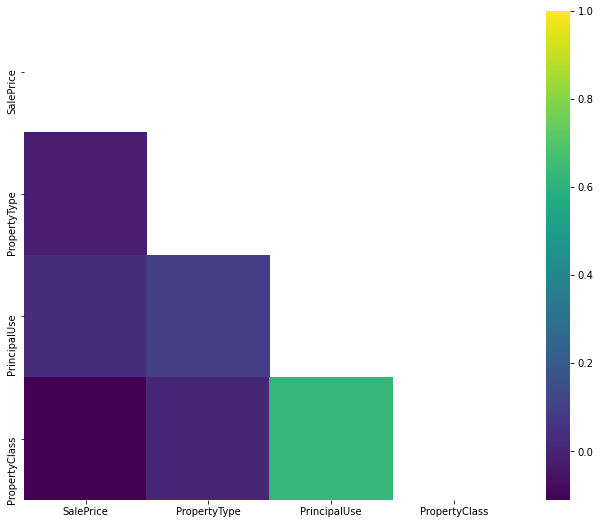

In [16]:
corr = df.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
# # half the heatmap is hidden since the top half is redundant
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [19]:
# # create a smaller df to save space and processing power
fsm_df = df[['DocumentDate', 'SalePrice', 'PropertyType', 'PrincipalUse', 'PropertyClass']].copy()
fsm_df.dropna(inplace=True)
fsm = ols(formula="SalePrice ~ DocumentDate + SalePrice + PropertyType + PrincipalUse + PropertyClass", data=fsm_df)
fsm_results = fsm.fit()

In [20]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.210e+30
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:05:31   Log-Likelihood:             8.8845e+05
No. Observations:               61444   AIC:                        -1.776e+06
Df Residuals:                   61075   BIC:                        -1.773e+06
Df Model:                         368                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.599e-08   2.08e-08      0.770      0.441   -2.47e-08    5.67e-08
DocumentDate[T.01/02/2019]  1.635e-08   2.31e-08      0.708      0.479   -2.89e-08    6.16e-08
DocumentDate[T.01/03/2019] -5.867e-08   2.29e-08     -2.558      0.011   -1.04e-07   -1.37e-08
DocumentDate[T.01/04/2019] -3.657e-08   2.37e-08     -1.546      0.122   -8.29e-08     9.8e-09
DocumentDate[T.01/05/2019]  -2.75e-09   3.89e-08     -0.071      0.944   -7.89e-08    7.34e-08
DocumentDate[T.01/06/2019]  5.749e-07   1.29e-07      4.452      0.000    3.22e-07    8.28e-07
DocumentDate[T.01/07/2019] -1.465e-08   2.29e-08     -0.641      0.522   -5.95e-08    3.02e-08
DocumentDate[T.01/08/2019]  3.216e-09    2.3e-08      0.140      0.889   -4.19e-08    4.84e-08
DocumentDate[T.01/09/2019]  2.925e-08    2.3e-08      1.274      0.203   -1.58e-08    7.43e-08
DocumentDate[T.01/10/2019] -2.308e-07   2.28e-08    -10.111      0.000   -2.76e-07   -1.86e-07
DocumentDate[T.01/11/2019] -2.287e-08   2.34e-08     -0.979      0.327   -6.86e-08    2.29e-08
DocumentDate[T.01/12/2019] -6.371e-08   3.58e-08     -1.779      0.075   -1.34e-07    6.49e-09
DocumentDate[T.01/13/2019]  4.076e-08   4.53e-08      0.900      0.368    -4.8e-08     1.3e-07
DocumentDate[T.01/14/2019] -2.927e-08   2.29e-08     -1.277      0.202   -7.42e-08    1.57e-08
DocumentDate[T.01/15/2019] -3.552e-09   2.34e-08     -0.152      0.879   -4.94e-08    4.23e-08
DocumentDate[T.01/16/2019] -1.033e-08   2.31e-08     -0.447      0.655   -5.56e-08    3.49e-08
DocumentDate[T.01/17/2019]  3.701e-07    2.3e-08     16.108      0.000    3.25e-07    4.15e-07
DocumentDate[T.01/18/2019] -2.023e-09    2.3e-08     -0.088      0.930   -4.71e-08    4.31e-08
DocumentDate[T.01/19/2019] -1.356e-06   3.47e-08    -39.111      0.000   -1.42e-06   -1.29e-06
DocumentDate[T.01/20/2019] -3.317e-06   7.64e-08    -43.385      0.000   -3.47e-06   -3.17e-06
DocumentDate[T.01/21/2019]  1.658e-08   3.17e-08      0.522      0.602   -4.56e-08    7.88e-08
DocumentDate[T.01/22/2019]  3.671e-08   2.27e-08      1.620      0.105   -7.69e-09    8.11e-08
DocumentDate[T.01/23/2019] -1.434e-07    2.3e-08     -6.233      0.000   -1.88e-07   -9.83e-08
DocumentDate[T.01/24/2019] -6.261e-09   2.26e-08     -0.277      0.782   -5.06e-08    3.81e-08
DocumentDate[T.01/25/2019] -3.888e-08   2.28e-08     -1.706      0.088   -8.36e-08    5.79e-09
DocumentDate[T.01/26/2019] -1.495e-08   3.17e-08     -0.471      0.638   -7.72e-08    4.73e-08
DocumentDate[T.01/27/2019]  -9.14e-07   4.73e-08    -19.342      0.000   -1.01e-06   -8.21e-07
DocumentDate[T.01/28/2019]    3.1e-07   2.25e-08     13.784      0.000    2.66e-07    3.54e-07
DocumentDate[T.01/29/2019] -1.141e-08   2.27e-08     -0.502      0.615   -5.59e-08    3.31e-08
DocumentDate[T.01/30/2019]  4.982e-08   2.2

In [21]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.1185796304961777
Rainbow p-value: 6.385443663346187e-23


In [22]:
y = fsm_df["SalePrice"]
y_hat = fsm_results.predict()

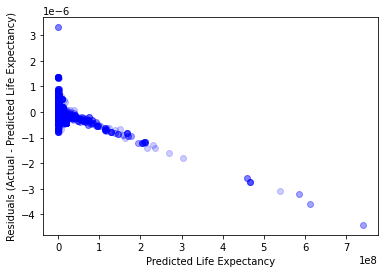

In [23]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Life Expectancy",
        ylabel="Residuals (Actual - Predicted Life Expectancy)")
ax2.scatter(x=y_hat, y=y-y_hat, color="blue", alpha=0.2);

In [24]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[["Schooling"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

KeyError: "None of [Index(['Schooling'], dtype='object')] are in the [columns]"

In [25]:
df_rp_sales = get_sale()

Before Filer EXTR_RPSale.csv:  (2107155, 24)
After Filer EXTR_RPSale.csv:  (61444, 7)


In [33]:
df_parcel = get_parcel()

Before EXTR_Parcel.csv:  (616089, 81)
After Filer EXTR_Parcel.csv:  (616089, 4)


In [36]:
df_res_bldg = get_resBldg()


Before EXTR_ResBldg.csv:  (517554, 50)
After Filer EXTR_Parcel.csv:  (517554, 2)


In [38]:
df_unit_breakdown = get_unitbreakdown()

EXTR_UnitBreakdown:  (25382, 7)


In [39]:
# propertyclass
df_rp_sales.corr()

,SalePrice,PropertyType,PrincipalUse,PropertyClass
SalePrice,1.000000,-0.025951,0.029230,-0.111127
PropertyType,-0.025951,1.000000,0.090453,0.007328
PrincipalUse,0.029230,0.090453,1.000000,0.629928
PropertyClass,-0.111127,0.007328,0.629928,1.000000


In [43]:
df_parcel

,Major,Minor,PropType,DistrictName
0,785662,370,R,BELLEVUE
1,990600,25,R,SEATTLE
2,286210,320,R,SEATTLE
3,264800,225,R,AUBURN
4,689181,90,R,KENMORE
...,...,...,...,...
616084,375520,160,R,KIRKLAND
616085,788360,1970,R,SEATTLE
616086,327780,1434,R,SEATTLE
616087,955020,295,R,SEATTLE


In [42]:
df_res_bldg.corr()

,Major,Minor
Major,1.000000,-0.318122
Minor,-0.318122,1.000000


In [44]:
def maj_min(df, drop=True):
    try:
        df.insert(0, 'Major+Minor', df.Major.astype(str) + df.Minor.astype(str))
        if drop==True:
            df.drop(['Major', 'Minor'], axis=1, inplace=True)
    except:
        print('columns missing')

    return df

In [46]:
maj_min(df_rp_sales)
maj_min(df_res_bldg)
# maj_min(df_lookup)
maj_min(df_unit_breakdown)
maj_min(df_parcel)

columns missing


,Major+Minor,PropType,DistrictName
0,785662370,R,BELLEVUE
1,99060025,R,SEATTLE
2,286210320,R,SEATTLE
3,264800225,R,AUBURN
4,68918190,R,KENMORE
...,...,...,...
616084,375520160,R,KIRKLAND
616085,7883601970,R,SEATTLE
616086,3277801434,R,SEATTLE
616087,955020295,R,SEATTLE


In [47]:
df = pd.merge(df_parcel, df_rp_sales, how='outer', on='Major+Minor')
print('1')
df = pd.merge(df, df_res_bldg, how='outer', on='Major+Minor')
print('2')
df = pd.merge(df, df_unit_breakdown, how='outer', on='Major+Minor')
print('3')

1
2
3


In [48]:
df

,Major+Minor,PropType,DistrictName,DocumentDate,SalePrice,PropertyType,PrincipalUse,PropertyClass,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
0,785662370,R,BELLEVUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,99060025,R,SEATTLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,286210320,R,SEATTLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,264800225,R,AUBURN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68918190,R,KENMORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687240,1472200025,NaN,NaN,06/29/2019,0.0,11.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
687241,5727500100,NaN,NaN,05/08/2019,3900.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
687242,5727500099,NaN,NaN,05/08/2019,3900.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
687243,6362900116,NaN,NaN,09/13/2019,0.0,11.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN


In [49]:
df.corr()

,SalePrice,PropertyType,PrincipalUse,PropertyClass,UnitTypeItemId,NbrThisType,SqFt,NbrBaths
SalePrice,1.000000,-0.027358,0.033577,-0.123793,-0.012126,0.264217,0.155140,0.136235
PropertyType,-0.027358,1.000000,0.089362,0.009209,0.115458,-0.082941,-0.081912,-0.023885
PrincipalUse,0.033577,0.089362,1.000000,0.604754,-0.000333,-0.006805,-0.078120,0.031101
PropertyClass,-0.123793,0.009209,0.604754,1.000000,-0.009662,-0.174618,-0.019229,-0.053259
UnitTypeItemId,-0.012126,0.115458,-0.000333,-0.009662,1.000000,-0.060516,0.118876,0.121213
NbrThisType,0.264217,-0.082941,-0.006805,-0.174618,-0.060516,1.000000,0.012832,-0.030548
SqFt,0.155140,-0.081912,-0.078120,-0.019229,0.118876,0.012832,1.000000,0.453788
NbrBaths,0.136235,-0.023885,0.031101,-0.053259,0.121213,-0.030548,0.453788,1.000000


In [50]:
# # create a smaller df to save space and processing power
fsm_df = df[['PropertyClass', 'NbrThisType', 'SqFt', 'NbrBaths', 'SalePrice']].copy()
fsm_df.dropna(inplace=True)
fsm = ols(formula="SalePrice ~ PropertyClass + NbrThisType + SqFt + NbrBaths", data=fsm_df)
fsm_results = fsm.fit()

In [51]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     19.78
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.64e-15
Time:                        08:23:28   Log-Likelihood:                -14303.
No. Observations:                 775   AIC:                         2.862e+04
Df Residuals:                     770   BIC:                         2.864e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.05e+06   4.18e+06     -1.448      0.148   -1.42e+07    2.15e+06
PropertyClass  2.243e+06   1.47e+06      1.530      0.126   -6.34e+05    5.12e+06
NbrThisType    1.795e+05   2.43e+04      7.382      0.000    1.32e+05    2.27e+05
SqFt           5710.7486   2447.814      2.333      0.020     905.569    1.05e+04
NbrBaths       4.894e+06   2.51e+06      1.946      0.052   -4.22e+04    9.83e+06
==============================================================================
Omnibus:                      407.193   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2344.533
Skew:                           2.406   Prob(JB):                         0.00
Kurtosis:                      10.033   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.4461296608984755
Rainbow p-value: 0.00015639238539581313


In [53]:
y = fsm_df["SalePrice"]
y_hat = fsm_results.predict()

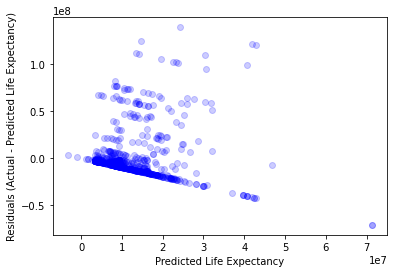

In [54]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Life Expectancy",
        ylabel="Residuals (Actual - Predicted Life Expectancy)")
ax2.scatter(x=y_hat, y=y-y_hat, color="blue", alpha=0.2);

In [82]:
df.head()

,Major+Minor,PropType,DistrictName,DocumentDate,SalePrice,PropertyType,PrincipalUse,PropertyClass,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
0,1722059228,C,KENT,08/14/2019,6844600.0,3.0,7.0,2.0,1.0,2.0,969.0,2,1.0
1,9528101345,C,SEATTLE,07/30/2019,1817452.0,3.0,4.0,2.0,1.0,2.0,650.0,1,1.0
2,9528101345,C,SEATTLE,07/30/2019,1817452.0,3.0,4.0,2.0,1.0,46.0,815.0,2,1.0
3,9528101345,C,SEATTLE,08/29/2019,1817452.0,3.0,4.0,2.0,1.0,2.0,650.0,1,1.0
4,9528101345,C,SEATTLE,08/29/2019,1817452.0,3.0,4.0,2.0,1.0,46.0,815.0,2,1.0


In [ ]:
label_encoder = LabelEncoder()
status_labels = label_encoder.fit_transform(df['DistrictName'])
status_labels

In [77]:
df = df.dropna().reset_index(drop = True)
df = df[df['SalePrice'] != 0.0]
df = df[df['SqFt'] != 0.0]

In [78]:
df.corr()

,SalePrice,PropertyType,PrincipalUse,PropertyClass,UnitTypeItemId,NbrThisType,SqFt,NbrBaths
SalePrice,1.000000,-0.011585,-0.073376,-0.026043,-0.001644,0.521407,0.111135,0.235434
PropertyType,-0.011585,1.000000,0.211647,0.040436,0.169180,-0.087560,0.074469,0.029778
PrincipalUse,-0.073376,0.211647,1.000000,-0.071901,-0.062201,0.009963,0.069191,0.034426
PropertyClass,-0.026043,0.040436,-0.071901,1.000000,-0.015314,-0.075361,0.078743,-0.015495
UnitTypeItemId,-0.001644,0.169180,-0.062201,-0.015314,1.000000,-0.111644,0.163191,0.102559
NbrThisType,0.521407,-0.087560,0.009963,-0.075361,-0.111644,1.000000,-0.054519,0.041787
SqFt,0.111135,0.074469,0.069191,0.078743,0.163191,-0.054519,1.000000,0.641943
NbrBaths,0.235434,0.029778,0.034426,-0.015495,0.102559,0.041787,0.641943,1.000000


In [79]:
# # create a smaller df to save space and processing power
fsm_df = df[['PropertyClass', 'NbrThisType', 'SqFt', 'NbrBaths', 'SalePrice']].copy()
fsm_df.dropna(inplace=True)
fsm = ols(formula="SalePrice ~ PropertyClass + NbrThisType + SqFt + NbrBaths", data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     38.79
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.18e-26
Time:                        08:45:05   Log-Likelihood:                -6283.2
No. Observations:                 338   AIC:                         1.258e+04
Df Residuals:                     333   BIC:                         1.260e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.162e+07   7.74e+06     -1.501      0.134   -2.68e+07    3.61e+06
PropertyClass  9.199e+05   2.64e+06      0.349      0.727   -4.27e+06    6.11e+06
NbrThisType    5.582e+05   4.96e+04     11.253      0.000    4.61e+05    6.56e+05
SqFt             92.1253   8640.775      0.011      0.991   -1.69e+04    1.71e+04
NbrBaths       1.784e+07   4.97e+06      3.592      0.000    8.07e+06    2.76e+07
==============================================================================
Omnibus:                       78.225   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.298
Skew:                           1.231   Prob(JB):                     1.40e-33
Kurtosis:                       5.164   Cond. No.                     4.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
df.head()

,Major+Minor,PropType,DistrictName,DocumentDate,SalePrice,PropertyType,PrincipalUse,PropertyClass,UnitTypeItemId,NbrThisType,SqFt,NbrBedrooms,NbrBaths
0,1722059228,C,KENT,08/14/2019,6844600.0,3.0,7.0,2.0,1.0,2.0,969.0,2,1.0
1,9528101345,C,SEATTLE,07/30/2019,1817452.0,3.0,4.0,2.0,1.0,2.0,650.0,1,1.0
2,9528101345,C,SEATTLE,07/30/2019,1817452.0,3.0,4.0,2.0,1.0,46.0,815.0,2,1.0
3,9528101345,C,SEATTLE,08/29/2019,1817452.0,3.0,4.0,2.0,1.0,2.0,650.0,1,1.0
4,9528101345,C,SEATTLE,08/29/2019,1817452.0,3.0,4.0,2.0,1.0,46.0,815.0,2,1.0


In [81]:
df['DistrictName'].value_counts()

SEATTLE        167
KENT            57
FEDERAL WAY     21
AUBURN          19
BELLEVUE        18
SeaTac          12
ISSAQUAH        11
KIRKLAND         9
TUKWILA          9
RENTON           5
KING COUNTY      3
REDMOND          2
DES MOINES       2
BURIEN           2
PACIFIC          1
Name: DistrictName, dtype: int64